<div style='float:left'>
<img style="-webkit-user-select: none" src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/marca_UOC_web.jpg">
<h1>
B2.332-A1.Features
</h1>


## Procedimiento

### Cargamos y/o instalamos las librerias necesarios

In [1]:
if(!require(mlbench)){
    install.packages('mlbench',dependencies =c("Depends", "Imports"),repos='http://cran.es.r-project.org')
    require(mlbench)
}
if(!require(caret)){
    install.packages('caret',dependencies =c("Depends", "Imports"),repos='http://cran.es.r-project.org')
    require(caret)
}
if(!require(lattice)){
    install.packages('lattice',dependencies =c("Depends", "Imports"),repos='http://cran.es.r-project.org')
    require(lattice)
}
if(!require(corrplot)){
    install.packages('corrplot',dependencies =c("Depends", "Imports"),repos='http://cran.es.r-project.org')
    require(corrplot)
}
if(!require(ggplot2)){
    install.packages('ggplot2',dependencies =c("Depends", "Imports"),repos='http://cran.es.r-project.org')
    require(ggplot2)
}
if(!require(class)){
    install.packages('class',dependencies =c("Depends", "Imports"),repos='http://cran.es.r-project.org')
    require(class)
}

Loading required package: mlbench
Warning message:
"package 'mlbench' was built under R version 3.3.3"Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"Loading required package: corrplot
Loading required package: class


### Cargamos los datos de un directorio local.

In [2]:
Alumnos_usos_sociales <- read.csv("B2.332_Students.csv", comment.char="#")

### Busqueda de correlaciones entre variables

age,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
18,0,4,3,4,1,1,3,4,0,11,11
17,0,5,3,3,1,1,3,2,9,11,11
15,0,4,3,2,2,3,3,6,12,13,12
15,0,3,2,2,1,1,5,0,14,14,14
16,0,4,3,2,1,2,5,0,11,13,13
16,0,5,4,2,1,2,5,6,12,12,13


                  age    failures       famrel     freetime       goout
age       1.000000000  0.28236357  0.007161921  0.002645147  0.11851012
failures  0.282363566  1.00000000 -0.053676457  0.102678757  0.07468331
famrel    0.007161921 -0.05367646  1.000000000  0.136900650  0.08061921
freetime  0.002645147  0.10267876  0.136900650  1.000000000  0.32355575
goout     0.118510124  0.07468331  0.080619212  0.323555753  1.00000000
Dalc      0.133452990  0.11633579 -0.076482657  0.144979128  0.25313483
Walc      0.098291406  0.10743159 -0.100663375  0.130377028  0.39979373
health   -0.029129265  0.04831102  0.104100776  0.081517225 -0.01373623
absences  0.153195647  0.09999785 -0.062170662 -0.032078736  0.05614214
G1       -0.124121249 -0.37417487  0.036947274 -0.051984712 -0.10116347
G2       -0.119474744 -0.37717218  0.042053621 -0.068951886 -0.10841089
G3       -0.125282433 -0.38314528  0.054461059 -0.064889679 -0.09787726
                Dalc        Walc      health    absences        

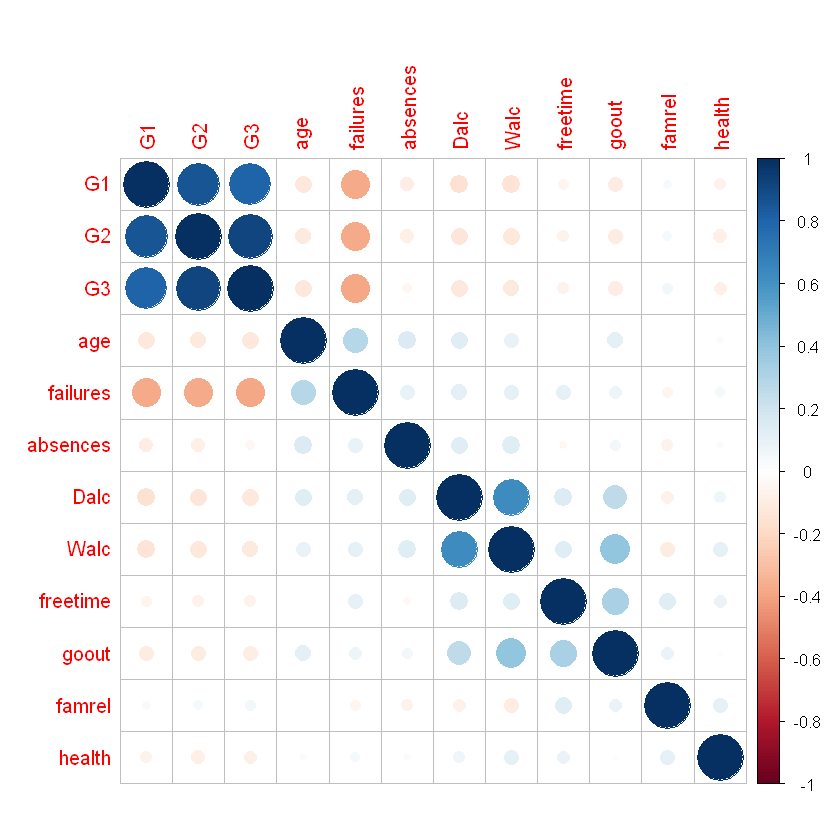

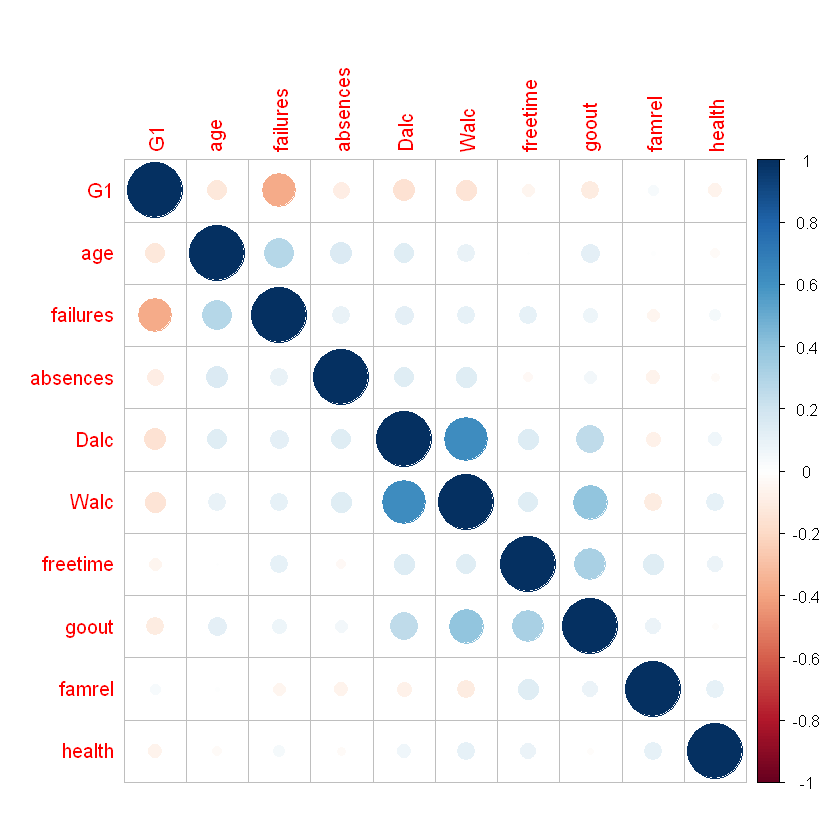

In [3]:
# corr contiene las variables que queremos trabajar
corr <- Alumnos_usos_sociales[,c(3,15,24:33)]
head(corr)
# Matriz de correlacion
correlacionMatrix <- cor(corr)
print(correlacionMatrix)
# Variables con alta correlacion que se pueden eliminar
MaxCorrelated <- findCorrelation(correlacionMatrix, cutoff=0.80)
print(MaxCorrelated)
corrplot(correlacionMatrix,order = "hclust")
corrFilter <- corr[,-MaxCorrelated]
corr.new <- cor(corrFilter)
corrplot(corr.new, order = "hclust")

### Extracción de variables con mayor peso al crear un modelo clasificador

sex,age,failures,schoolsup,famsup,famrel,freetime,goout,Dalc,Walc,health,absences,G1,Supera
F,18,0,yes,no,4,3,4,1,1,3,4,0,Si
F,17,0,no,yes,5,3,3,1,1,3,2,9,Si
F,15,0,yes,no,4,3,2,2,3,3,6,12,Si
F,15,0,no,yes,3,2,2,1,1,5,0,14,Si
F,16,0,no,yes,4,3,2,1,2,5,0,11,Si
M,16,0,no,yes,5,4,2,1,2,5,6,12,Si


ROC curve variable importance

          Importance
G1            0.9350
famrel        0.5155
famsup        0.4972
schoolsup     0.4867
sex           0.4855
health        0.4767
absences      0.4645
freetime      0.4548
Walc          0.4519
Dalc          0.4456
goout         0.4259
age           0.4135
failures      0.3267


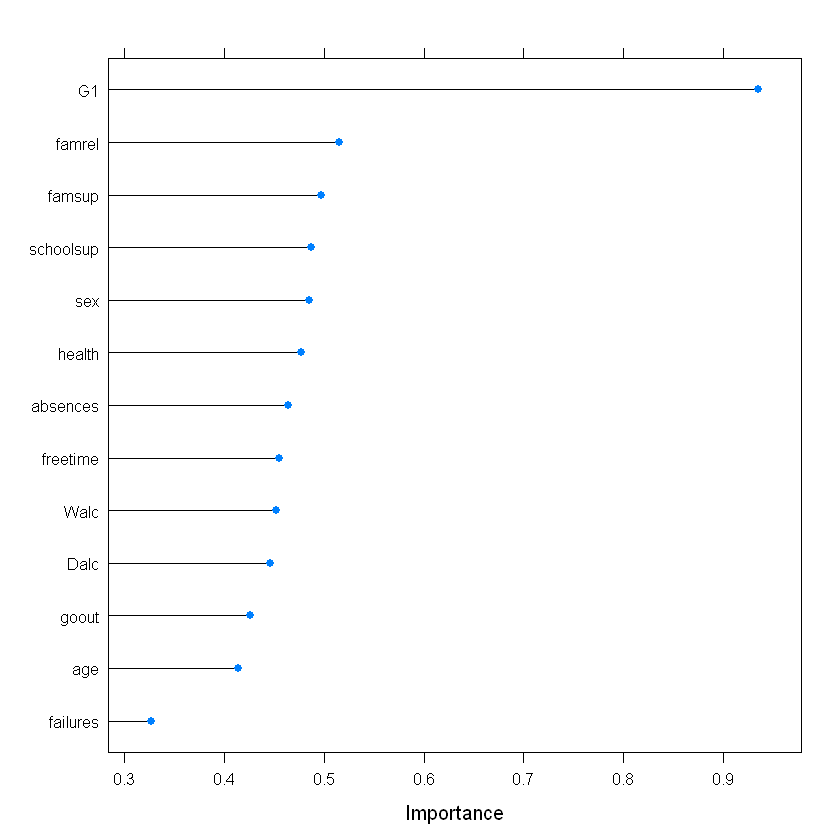

In [4]:
# R contiene las variables que queremos trabajar
bestfet <- Alumnos_usos_sociales[,c(2,3,15:17,24:31,34)]
head(bestfet)
# Parametros lvq
control <- trainControl(method="repeatedcv", number=30, repeats=10)
# Creacion del modelo
model <- train(Supera~., data=bestfet, method="lvq", preProcess="scale", trControl=control)
# variables mas importantes 
bestfetimp <- varImp(model, scale=FALSE)
print(bestfetimp)
plot(bestfetimp)